In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

# setting params
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}


sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600 #long description



In [41]:
df=pd.read_csv('psychometric.csv')

In [42]:
df.head()

,employee_name,user_id,O,C,E,A,N,label
0,Calvin Edan Love,CEL0561,40,39,36,19,40,0
1,Christine Reagan Deleon,CRD0624,26,22,17,39,32,0
2,Jade Felicia Caldwell,JFC0557,22,16,23,40,33,0
3,Aquila Stewart Dejesus,ASD0577,40,48,36,14,37,0
4,Micah Abdul Rojas,MAR0955,36,44,23,44,25,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_name  1000 non-null   object
 1   user_id        1000 non-null   object
 2   O              1000 non-null   int64 
 3   C              1000 non-null   int64 
 4   E              1000 non-null   int64 
 5   A              1000 non-null   int64 
 6   N              1000 non-null   int64 
 7   label          1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [44]:
df.describe()

,O,C,E,A,N,label
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,33.173000,30.653000,29.19700,28.821000,29.608000,0.030000
std,10.642007,11.291505,10.95647,11.170844,4.938494,0.170673
min,10.000000,10.000000,10.00000,10.000000,14.000000,0.000000
25%,23.000000,20.000000,19.00000,19.000000,26.000000,0.000000
50%,36.000000,33.000000,28.00000,27.000000,29.000000,0.000000
75%,42.000000,40.000000,39.00000,39.000000,33.000000,0.000000
max,50.000000,50.000000,50.00000,50.000000,49.000000,1.000000


In [45]:
df.label.value_counts()

0    970
1     30
Name: label, dtype: int64

In [46]:
df=df.drop(columns=['employee_name', 'user_id'])

In [47]:
df.head()

,O,C,E,A,N,label
0,40,39,36,19,40,0
1,26,22,17,39,32,0
2,22,16,23,40,33,0
3,40,48,36,14,37,0
4,36,44,23,44,25,1


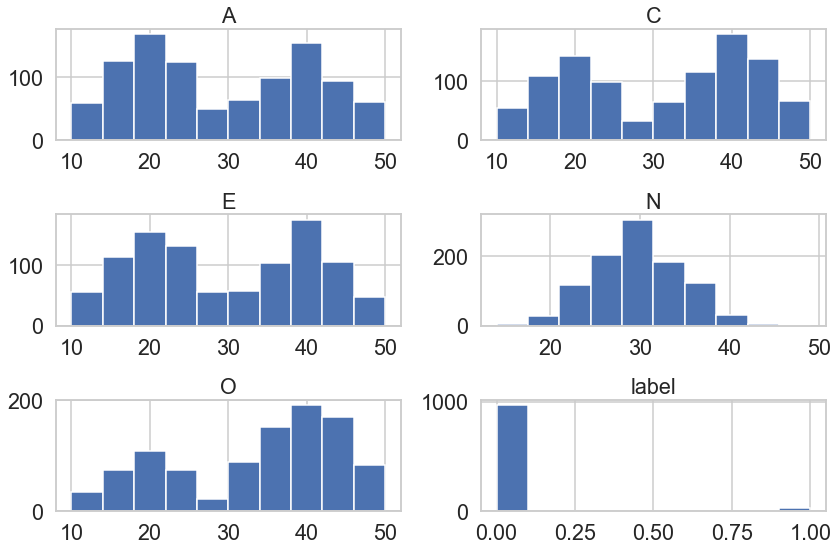

In [48]:
df.hist()
plt.tight_layout()
plt.show()

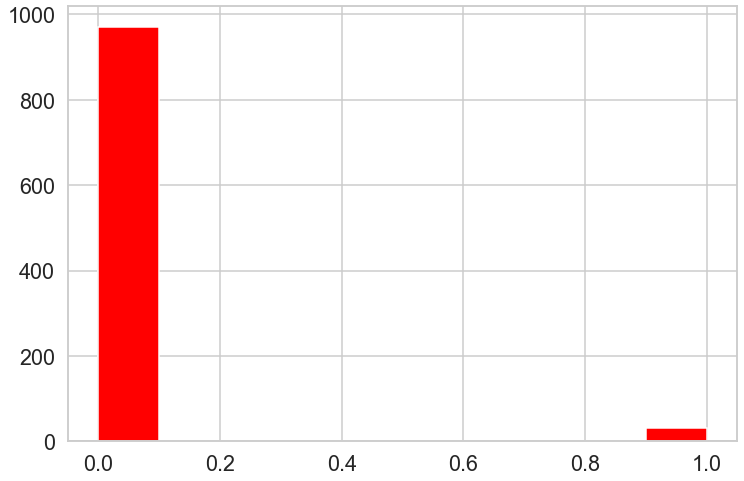

In [50]:
plt.hist(df['label'], color='red')

plt.show()

In [51]:
breach=df['label'].value_counts()[1]
nonbreach=df['label'].value_counts()[0]

print(f'Breach:{breach}, Non-breach:{nonbreach}')

print(f'Ratio of breach to non-breach: {breach}/{nonbreach} ({breach/nonbreach*100:.3f}%)')

Breach:30, Non-breach:970
Ratio of breach to non-breach: 30/970 (3.093%)


Text(0.5, 1.0, 'Label Distributions \n (0: No Breach || 1: Breach)')

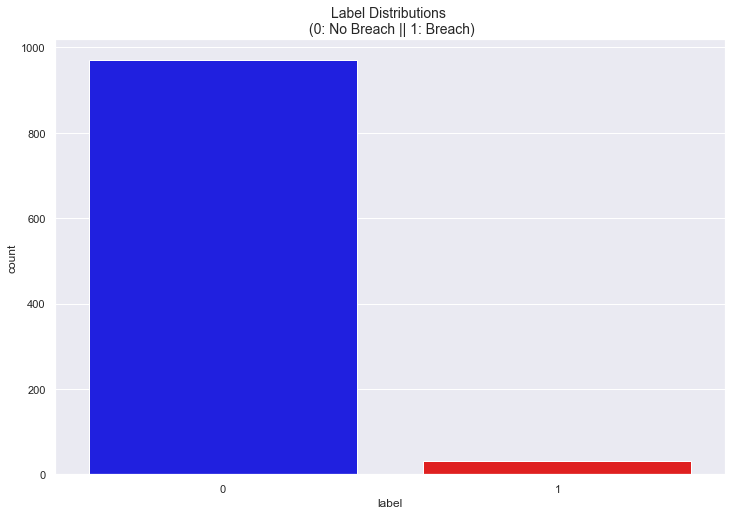

In [112]:
colors=['blue','red']
sns.countplot('label', data=df, palette=colors)
plt.title('Label Distributions \n (0: No Breach || 1: Breach)', fontsize=14)

In [113]:
#Correlation Matrix (Pearson)

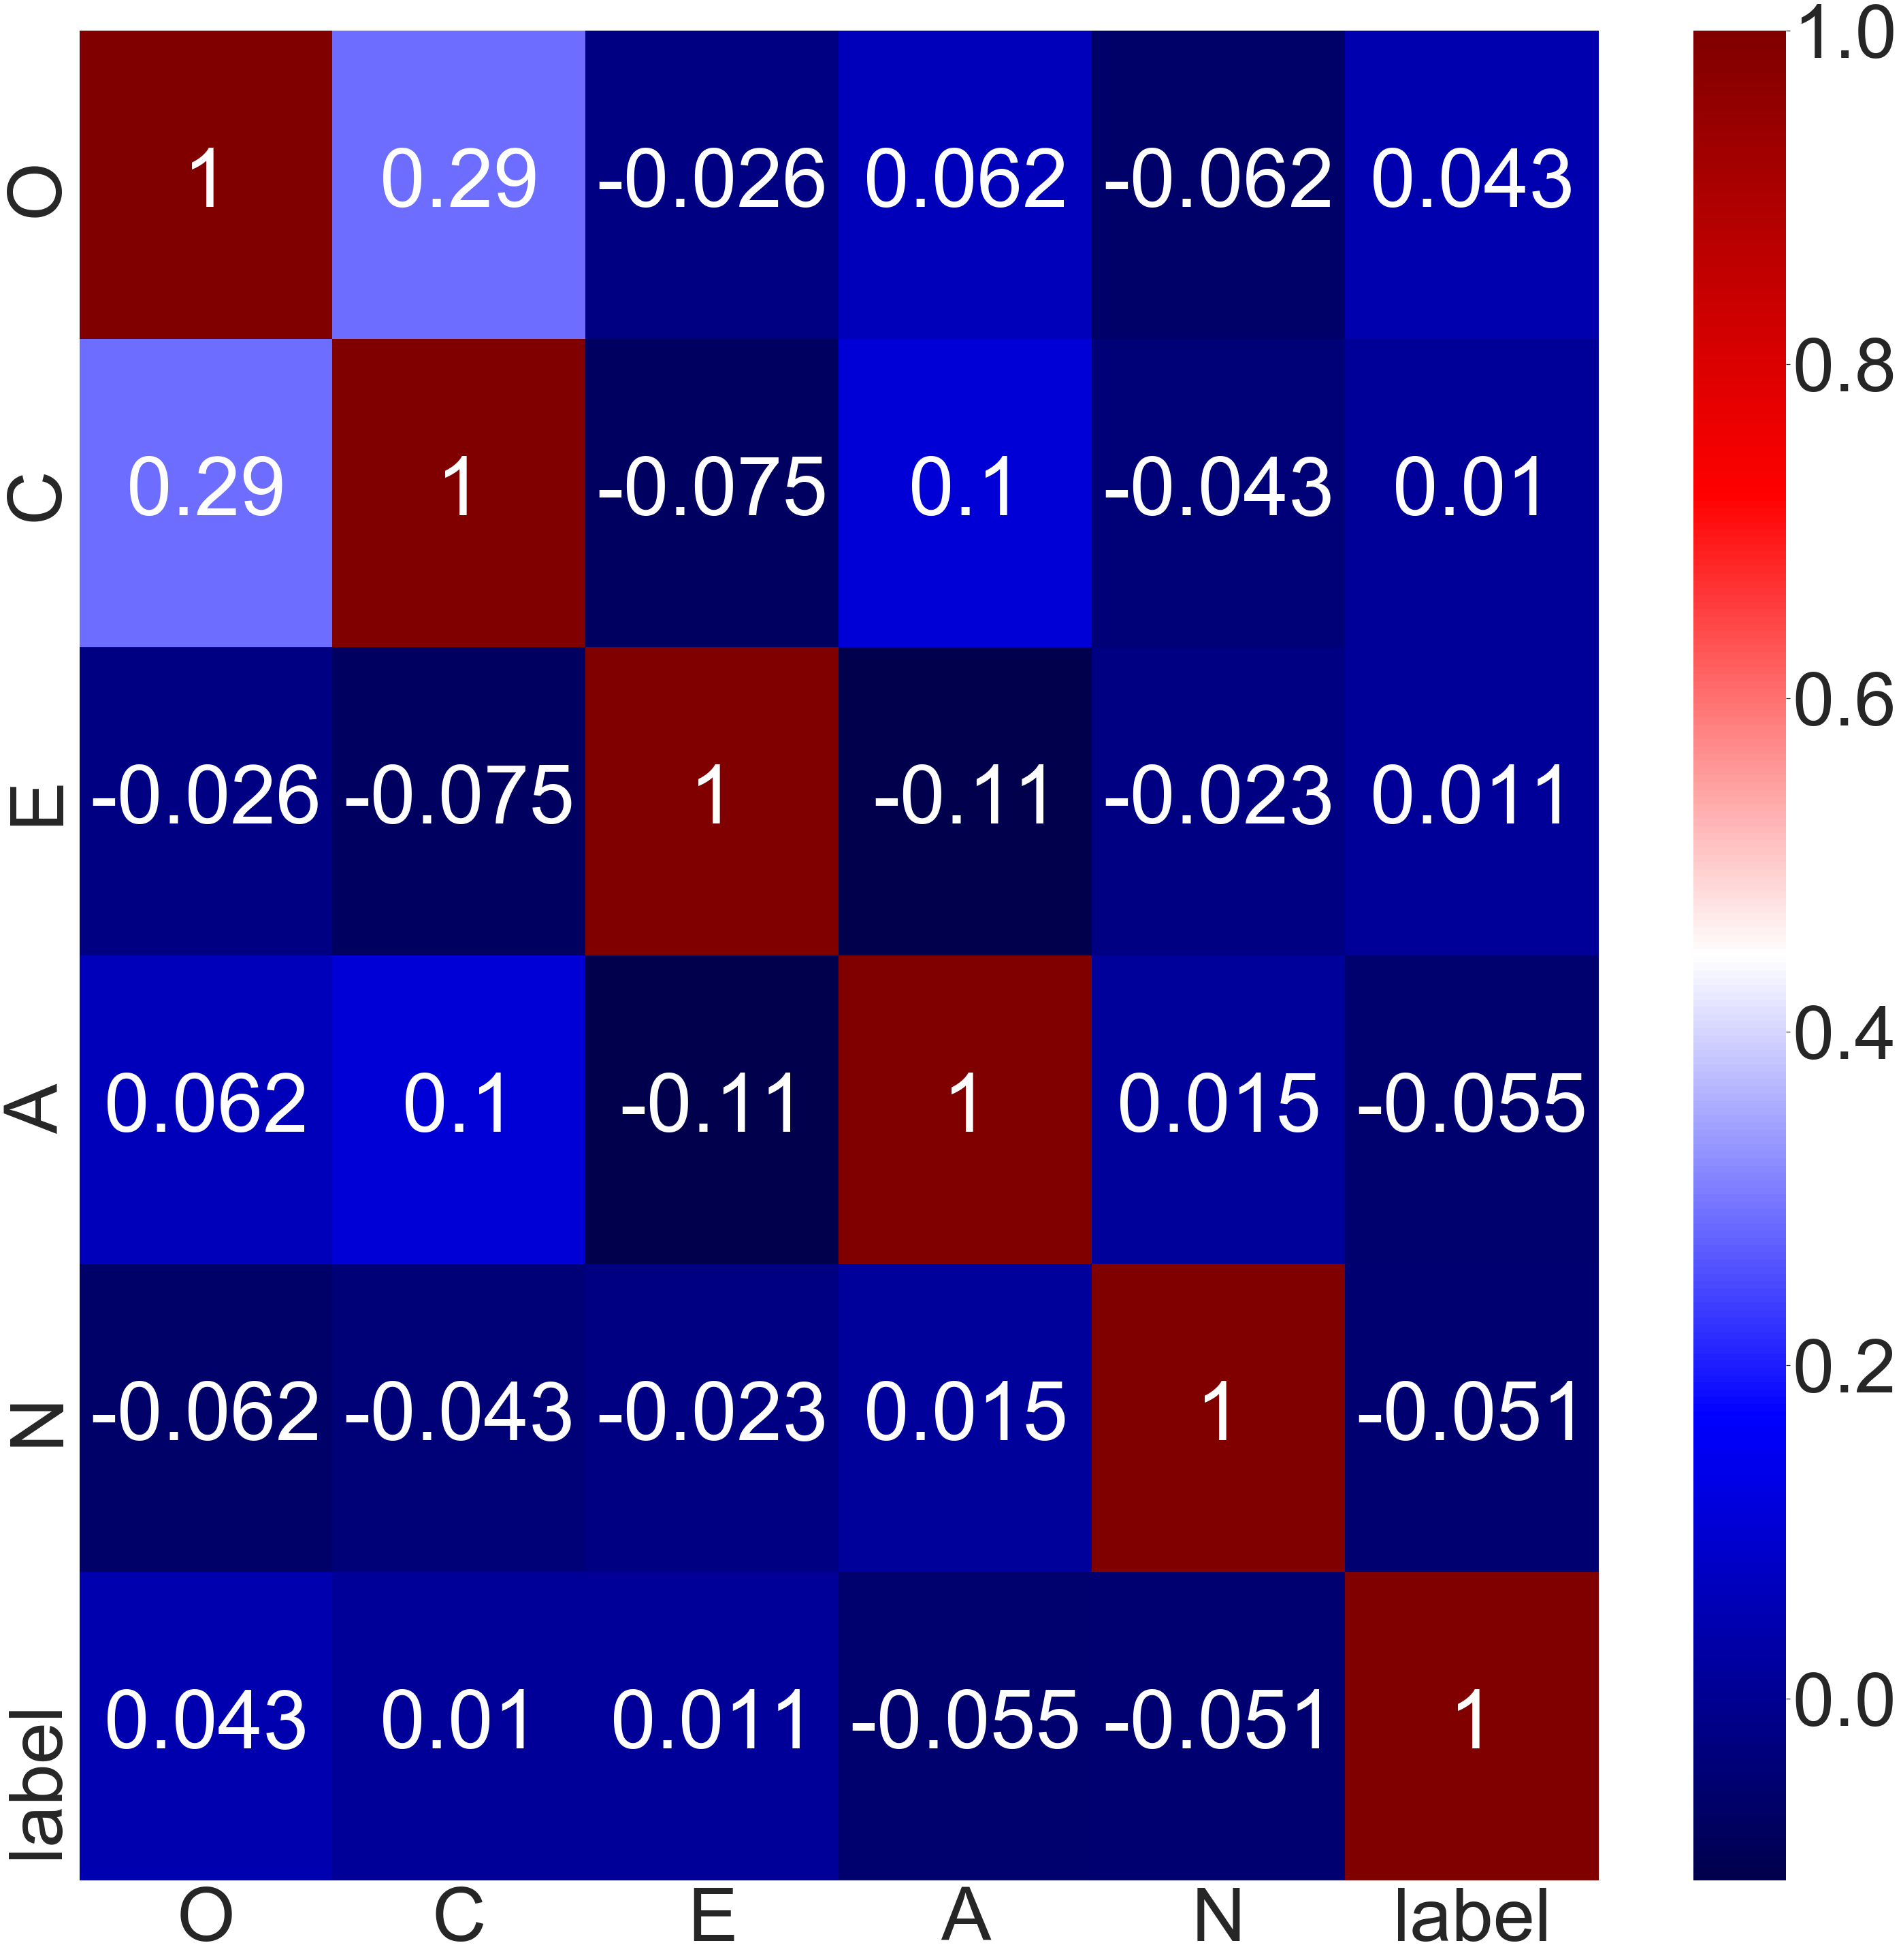

In [127]:
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=10)
sns.heatmap(data=df.corr(), cmap="seismic", ax=ax, annot=True)
plt.show();

## Chi Square

In [121]:
from sklearn.feature_selection import chi2, SelectKBest



In [124]:
skb = SelectKBest(score_func=chi2, k=5)
skb.fit(data,answer)

SelectKBest(k=5, score_func=<function chi2 at 0x1a19431950>)

In [138]:
feature_scores = [(item, score) for item, score in zip(data, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:5]

[('A', 13.053002350925157),
 ('O', 6.27181288388903),
 ('N', 2.1700478462679875),
 ('E', 0.5235063339723172),
 ('C', 0.4223622517565291)]

In [143]:
#Model based selection/ importance of the variables according to random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(data, answer)

#top 5 features
importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(data, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:5]

[('E', 0.23095787173404222),
 ('C', 0.21491568687579982),
 ('A', 0.20430739641295428),
 ('N', 0.17884199464456174),
 ('O', 0.1709770503326419)]

In [136]:
data= df.drop('label', axis=1)
answer = df['label']


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

In [70]:
X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['label'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

In [71]:
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val_std,y_val)

### Logistic Regression

In [72]:
# Run CV with 5 folds (logit)

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0250s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0324s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0272s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

### SVM

In [73]:
# # Run CV with 5 folds (SVM)

C = [1]
gammas = [0.001, 0.1]
param_grid = dict(C=C, gamma=gammas)

svm1 = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0197s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

### Naive Bayes

In [77]:
# Fit a Naive Bayes Model

gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)



### Random Forest

In [78]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   42.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

### Dummy Classifier

In [81]:
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

## Find ROC scores for all models

In [79]:
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_, 
#                   svm_grid.best_estimator_, 
                  gnb_best,
                  rf_grid.best_estimator_,
                  dummy
                 ]

    model_name = ['Logit','Naive Bayes','Random Forest','Dummy']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

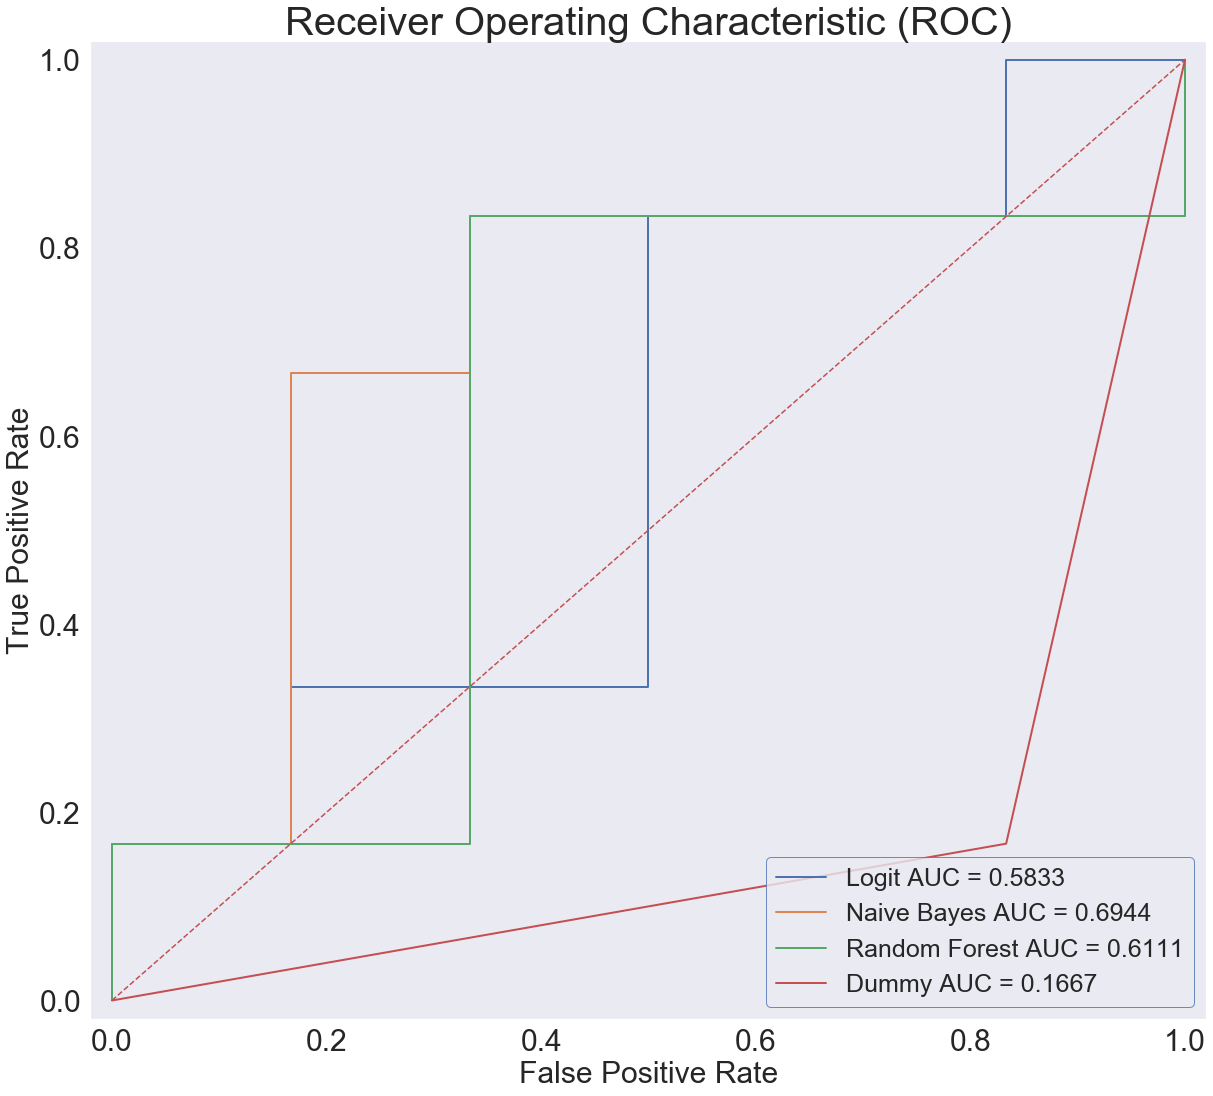

In [82]:
#in sample
roc_scores(X_val_under,y_val_under)

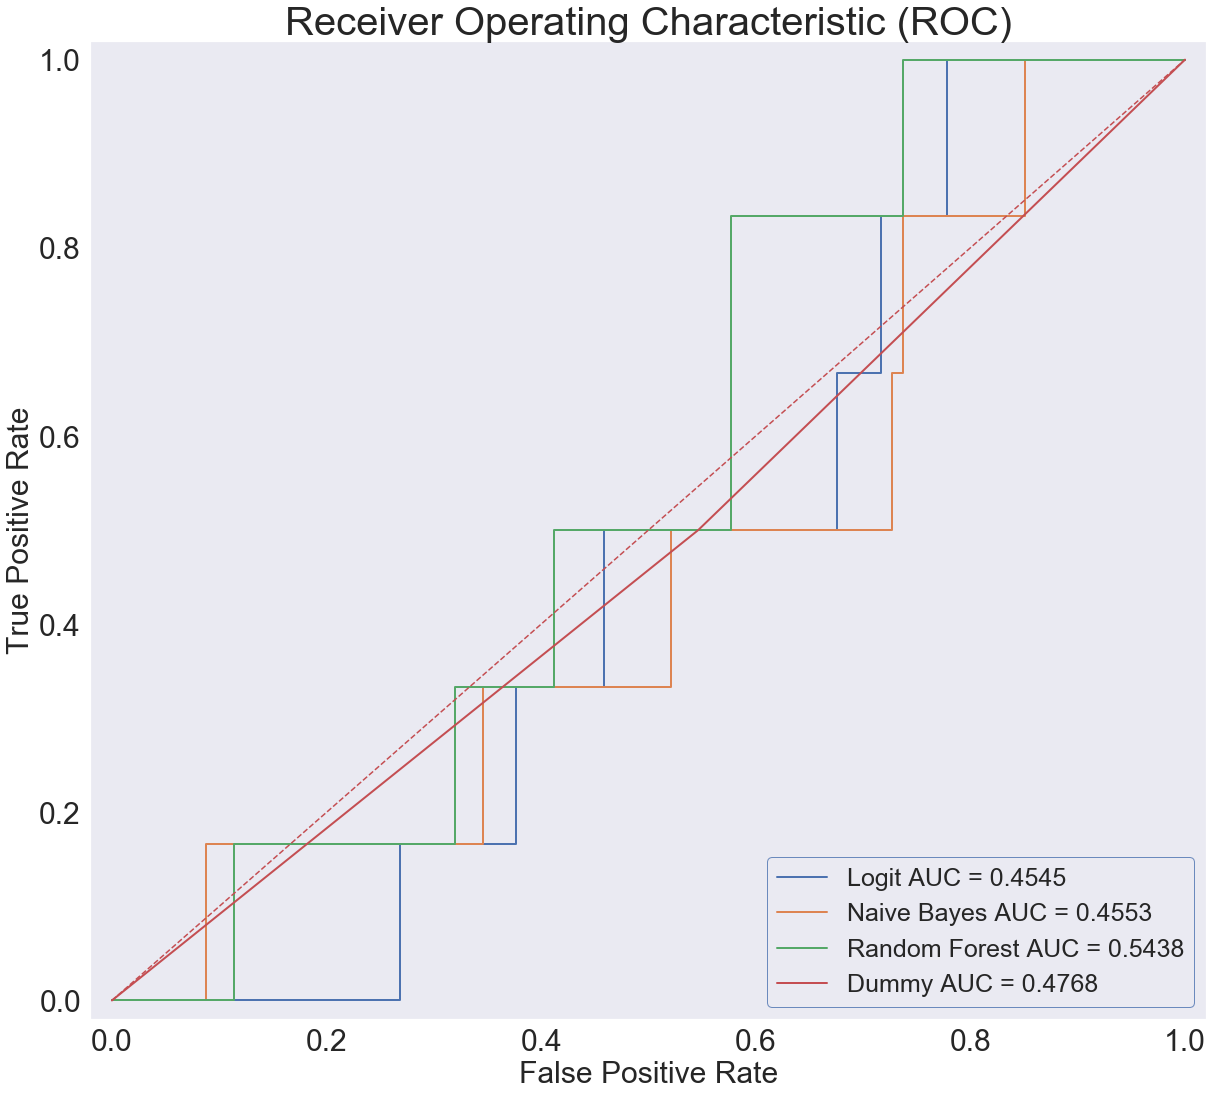

In [84]:
#out of sample
roc_scores(X_test_std,y_test)

## Find the best threshold 

In [85]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [86]:
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [87]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [88]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.210526,0.705882,0.583333,1.000000,0.545455
1,Naive-Bayes,0.421053,0.727273,0.750000,0.666667,0.800000
2,Random Forest,0.421053,0.666667,0.583333,0.833333,0.555556


In [93]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

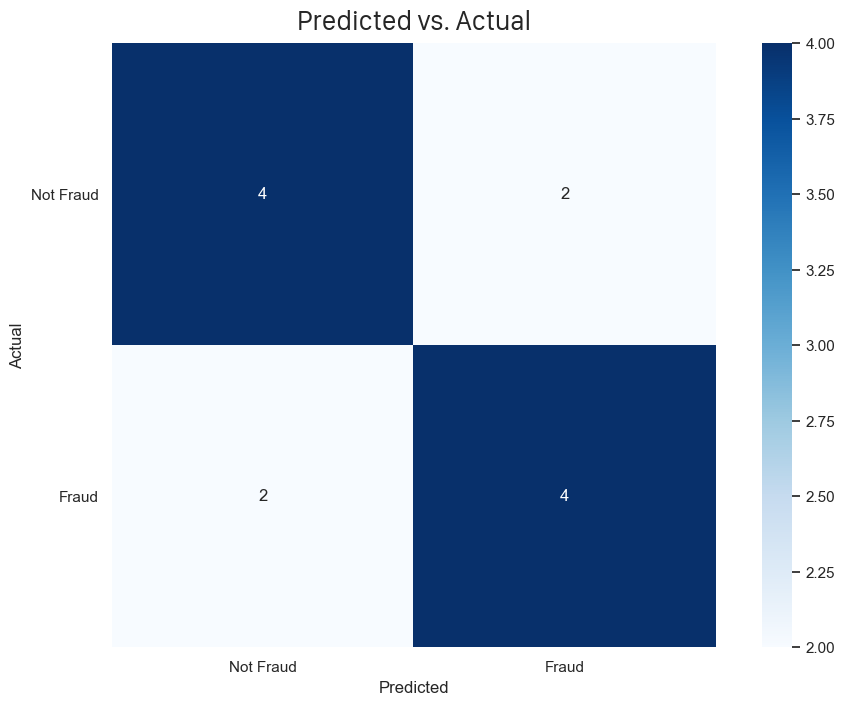

In [96]:
make_confusion_matrix_val(rf_grid, threshold=0.45)



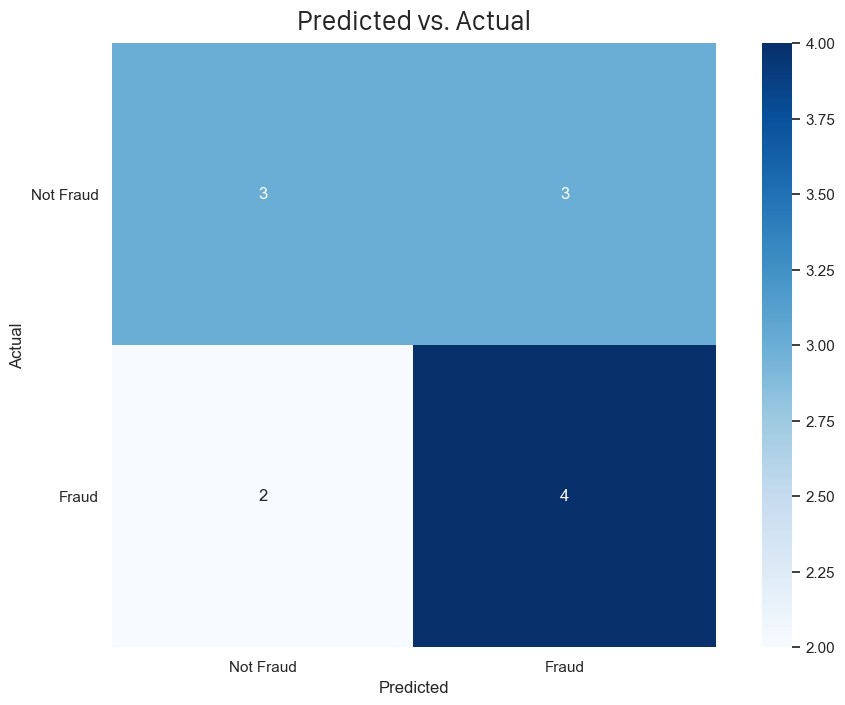

In [98]:
#fixed confusion matrix - logit, validation
make_confusion_matrix_val(logistic_grid, threshold=0.42)

In [99]:
def make_confusion_matrix_test(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

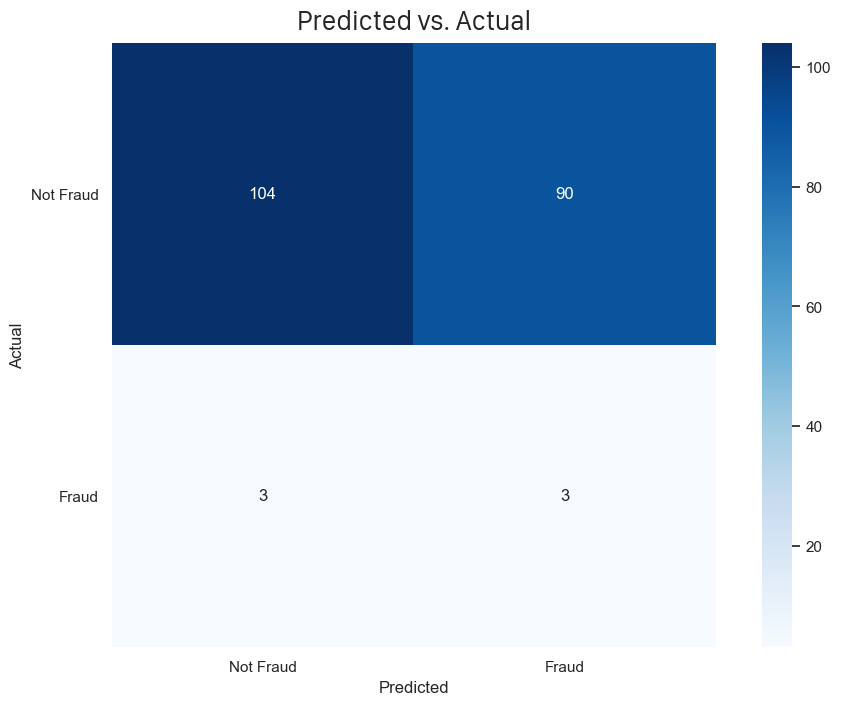

In [109]:
#fixed confusion matrix - random forest, test
make_confusion_matrix_test(rf_grid)

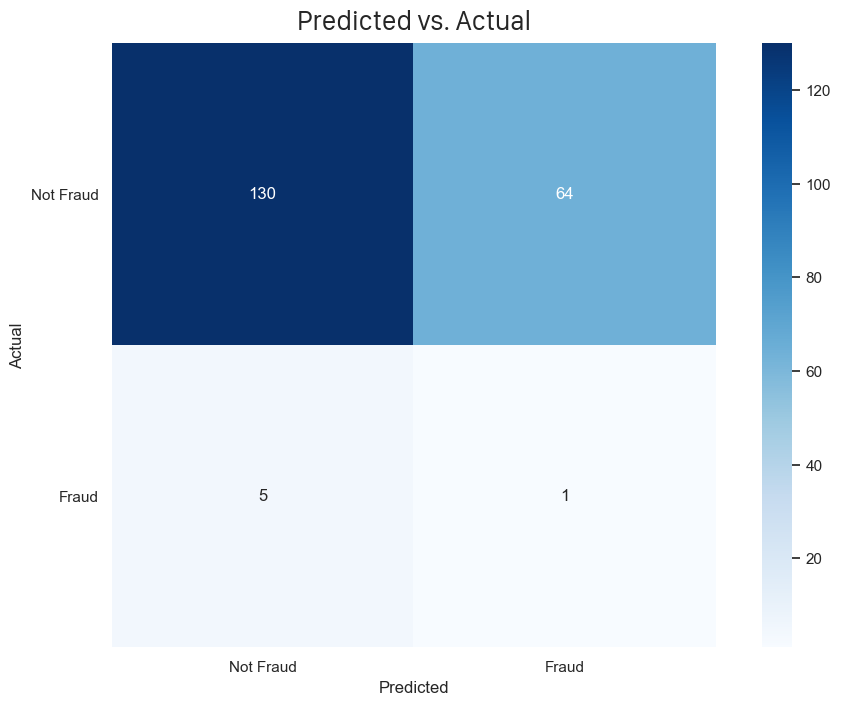

In [111]:
#fixed confusion matrix - logit, test
make_confusion_matrix_test(logistic_grid, threshold=0.642)
#threshold ile oynanabilir